# Homework: List of planets with mass and distance, Center of Mass for each system

# 1. Read and get the Center of Mass 
We need to estimate the CM for each planet, so:
\begin{equation*}
\text{CM} = \frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{\sum \limits_{k=1}^{n}m_{k}} %=\frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{M_{T}}
\end{equation*}
For do it, is nessesary get the values CM for each planet, so with the columns of `mass` and distance from the star  `semi_major_axis` we can get $\boxed{m_{k}\vec{r_{k}}}$ values.
List of planets from exoplanet.eu 




## 1. Read and get the Center of Mass 
We need to estimate the CM for each planet, so:
\begin{equation*}
\text{CM} = \frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{\sum \limits_{k=1}^{n}m_{k}} %=\frac{\sum\limits_{k=1}^n(m_{k}\vec{r_{k}})}{M_{T}}
\end{equation*}
For do it, is nessesary get the values CM for each planet, so with the columns of `mass` and distance from the star  `semi_major_axis` we can get $\boxed{m_{k}\vec{r_{k}}}$ values.
List of planets from exoplanet.eu 

**Remember**: `pd.notnull("name_of_column")` deletes the NaN values in the column. 

**Remember**: `data=data[['column_a','column_b',..,'column_n',]]` to get a new order in the DataFrame

### data1:
Now is necessary processing the data with the prurpose to obtain the Center of Mass CM, `data1` is a DataFrame without the NaN values of _mass_ and _semi major axis_. Finally, we get 1523 rows.

**Remember:** The `data.groupby("key")` split the data in groups which are the key.

**Remember:** The `data[i].multiply(data[j])` multiplies the comun i and j of DataFrame or Series i and j, row by row.

**Remember:** The `data.groupby.groups.keys()` get the keys of the split data.

However, the calculus of the CM, counting the planetary systems with the same satar. 


### data2:
So, `data2` is a DataFrame without the NaN values of mass, semi major axis and their uncertainties. Finally, we get 1220 rows, 303 rows less than `data1`. 

In [1]:
import pandas as pd 
import numpy as np

data_ep = pd.read_csv('data/exoplanet.eu_catalog.csv', 
                      usecols=['mass','mass_error_min','mass_error_max',
                               'semi_major_axis','semi_major_axis_error_min','semi_major_axis_error_max','star_name'])

class System:
    def __init__(self, data):
        self.data=data
        self.system = list(self.data.groupby("star_name").groups.keys())
        self.Number()
        self.Mass()
        self.CenterOfMass()
        #self.Error_CM()
        
    def Number(self):
        sys = self.data.groupby("star_name")
        self.Data1 = len(sys["mass"])
        
    def Mass(self):
        sys = self.data.groupby("star_name")
        self.M_total = sys["mass"].sum()
    
    def CenterOfMass(self):
        self.rm_i = self.data["mass"].multiply(self.data["semi_major_axis"])
        self.data_i = self.data.assign(CM_i = self.rm_i.values) 
        p_system = self.data_i.groupby("star_name")
        sum_rm = p_system['CM_i'].sum()#.tolist()
        self.CM = sum_rm.divide(self.M_total)   
    
    def Error_CM(self):
        Sm2 = (self.data["mass_error_min"].multiply(self.data["mass_error_min"]))
        Sr2 = (self.data["semi_major_axis_error_min"].multiply(self.data["semi_major_axis_error_min"]))
        self.E_rm_i=np.sqrt(Sm2.divide(Sr2)+Sm2.divide(Sr2))

In [2]:
#data_ep.index[1]==True


In [4]:
data = data_ep[pd.notnull(data_ep["mass"])]
data = data[pd.notnull(data["semi_major_axis"])]
data1 = data[['star_name','mass','semi_major_axis']]

Data1=System(data1)
Data1


#Data1 = pd.DataFrame({'system_name':Data1.system,'total_mass':Data1.M_total.tolist(),'center_of_Mass':Data1.CM.tolist()})
#data1
#problema que guarda total mass en la funcion 

In [21]:
data2 = data_ep.dropna()
data2 = data2[['star_name',"mass","mass_error_min",
               "semi_major_axis", "mass_error_max",
               "semi_major_axis_error_min", 
               "semi_major_axis_error_max"]]
Data2=System(data2)
#CM_2=CenterOfMass(Data2).M_total()
#system_2 = list(data2.groupby("star_name").groups.keys())
#system
#data2 = pd.DataFrame({'system_name':system_2,'total_mass':M_total.tolist(),'center_of_Mass':CM_2.tolist()})
#data1

In [29]:
a=Data2.CenterOfMass
a

<bound method System.CenterOfMass of <__main__.System object at 0x7f7ce328fed0>>

In [11]:
filter=(data2.mass_error_max==data2.mass_error_min)&(data2.semi_major_axis_error_min==data2.semi_major_axis_error_max)
data3=data2[filter]
data3

,star_name,mass,mass_error_min,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,mass_error_max
1,11 Oph,21.00000,3.00000,243.00000,55.00000,55.00000,3.00000
9,1RXS J235133.3+312720,32.00000,6.00000,120.00000,20.00000,20.00000,6.00000
16,2M 0122-24,20.00000,7.00000,52.00000,6.00000,6.00000,7.00000
17,2M 0219-39,13.90000,1.10000,156.00000,10.00000,10.00000,1.10000
18,2M 0441+23,7.50000,2.50000,15.00000,0.60000,0.60000,2.50000
...,...,...,...,...,...,...,...
4179,XO-7,0.70900,0.03400,0.04421,0.00062,0.00062,0.03400
4191,beta Pic,12.70000,2.20000,9.68000,0.30000,0.30000,2.20000
4192,beta Pic,9.37000,1.00000,2.72000,0.02000,0.02000,1.00000
4195,eps Eridani,0.77000,0.20000,3.39000,0.36000,0.36000,0.20000


In [20]:
number=(data3["star_name"].value_counts())#.to_frame()
number

TRAPPIST-1    4
Kepler-289    3
WASP-47       3
Kepler-18     3
Kepler-107    3
             ..
HATS-59       1
HAT-P-65      1
Qatar-2       1
K2-99         1
WASP-141      1
Name: star_name, Length: 493, dtype: int64

In [13]:
nlist=number.index[number.star_name>1]

In [14]:
len(nlist)

27

In [15]:
for i in range(len(nlist)):
    data4=data3[data3.star_name==nlist[i]]
    draws=[]
    for i in range(1000):
        masses=np.random.normal(data4.mass,data4.mass_error_min)
        axes=np.random.normal(data4.semi_major_axis,data4.semi_major_axis_error_min)
        draws+=[(masses*axes).sum()/masses.sum()]
    mtot=(data4.mass).sum()
    com=(data4.mass*data4.semi_major_axis).sum()/mtot
    dcmdmi=(data4.semi_major_axis-com)/mtot
    dcmdri=data4.mass/mtot
    erd=np.std(draws)
    erp=np.sqrt((dcmdmi**2*data4.mass_error_min**2+dcmdri**2*data4.semi_major_axis_error_min**2).sum())
    #print(erd,erp)
#type(data4)    

In [16]:
#data4.mass

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data4=data3[data3.star_name==nlist[0]]
data4

,star_name,mass,mass_error_min,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,mass_error_max
3919,TRAPPIST-1,0.00270,0.00230,0.01111,0.00034,0.00034,0.00230
3920,TRAPPIST-1,0.00434,0.00190,0.01521,0.00047,0.00047,0.00190
3923,TRAPPIST-1,0.00210,0.00057,0.03710,0.00110,0.00110,0.00057
3924,TRAPPIST-1,0.00422,0.00280,0.04510,0.00140,0.00140,0.00280


In [20]:
draws=[]
for i in range(1000):
    masses=np.random.normal(data4.mass,data4.mass_error_min)
    print(masses)
    axes=np.random.normal(data4.semi_major_axis,data4.semi_major_axis_error_min)
    draws+=[(masses*axes).sum()/masses.sum()]
#masses

[0.01229037 0.01290987 0.07057577 0.0296004  0.37718586]
[0.01413847 0.01146723 0.07401464 0.02497661 0.2396941 ]
[0.0123312  0.00811756 0.06443527 0.03617903 0.30288936]
[0.01102072 0.01082287 0.06475732 0.03473063 0.37179595]
[0.01235262 0.01225137 0.06786653 0.02693442 0.30949337]
[0.01370179 0.01100177 0.06155192 0.04210811 0.32616959]
[0.01063977 0.00773396 0.06226458 0.03794477 0.40202904]
[0.01310391 0.0105236  0.07107033 0.02713209 0.38988491]
[0.01220635 0.01040767 0.07234799 0.03727686 0.22696044]
[0.01184283 0.00966277 0.06712102 0.04179311 0.32414272]
[0.01133224 0.0097793  0.06571454 0.0327884  0.33259038]
[0.01109209 0.0112004  0.06393892 0.03614572 0.27267789]
[0.01354794 0.01005614 0.06415982 0.0337574  0.16435737]
[0.0120582  0.01185133 0.07029909 0.03642293 0.31484819]
[0.01259678 0.01166263 0.06642234 0.03055132 0.19305463]
[0.01255185 0.01000334 0.06365871 0.03865076 0.40023285]
[0.0099634  0.01011074 0.06746354 0.02735886 0.35491138]
[0.01292005 0.01435299 0.070924

[0.01225554 0.0091706  0.06947227 0.03486312 0.33570828]
[0.01104137 0.01214294 0.0679195  0.03059992 0.32399474]
[0.01474778 0.00909687 0.06388765 0.03731556 0.24399402]
[0.01197407 0.00976466 0.07216297 0.0418481  0.30718209]
[0.01201061 0.01064874 0.06025087 0.04000021 0.22830405]
[0.01106052 0.01380896 0.06750027 0.03545628 0.22064251]
[0.01159805 0.00759776 0.06028456 0.03689534 0.23380879]
[0.01253221 0.00912882 0.06776449 0.03663571 0.15565424]
[0.01095793 0.01363065 0.06709198 0.03334274 0.32122583]
[0.01105835 0.0134797  0.06841731 0.03188029 0.28545533]
[0.01333249 0.00979761 0.06943998 0.03658048 0.26903187]
[0.01114363 0.01093758 0.0730906  0.03602408 0.30944085]
[0.01137898 0.00806756 0.0709865  0.04012111 0.37274295]
[0.01054812 0.00974241 0.06850393 0.03065373 0.20700212]
[0.01199503 0.01096904 0.06573173 0.03305054 0.31248194]
[0.01172355 0.00918208 0.06610665 0.03113078 0.47875292]
[0.01364636 0.00694115 0.07269828 0.03615945 0.31534759]
[0.01121909 0.01133497 0.066803

[0.00995664 0.01175211 0.06865989 0.03200396 0.38433812]
[0.01083022 0.01046044 0.06093079 0.03158109 0.24974853]
[0.01193482 0.010989   0.06356016 0.04157484 0.24950115]
[0.01159695 0.01183118 0.06923542 0.03416821 0.21140942]
[0.01211959 0.00640178 0.07105299 0.03625906 0.24415081]
[0.01270044 0.01480219 0.06150604 0.04092552 0.27389673]
[0.01340789 0.01152586 0.06405123 0.03466099 0.2715501 ]
[0.01081615 0.00873339 0.06494967 0.03633324 0.29062213]
[0.01227959 0.01160273 0.07125941 0.0358147  0.29978598]
[0.01106162 0.01093575 0.0677049  0.03935923 0.30839134]
[0.01223756 0.0096404  0.07014243 0.02110501 0.32261343]
[0.01132693 0.01296016 0.06965778 0.03645893 0.23327003]
[0.01056782 0.01309536 0.0705806  0.03382778 0.25905822]
[0.01208202 0.01130823 0.07277602 0.03203562 0.16429383]
[0.01362852 0.00984031 0.06420399 0.03404889 0.31571259]
[0.01267481 0.01524227 0.06863898 0.03144542 0.24633676]
[0.01203395 0.00798139 0.06406637 0.03345108 0.21055371]
[0.01343467 0.01294472 0.055937

(array([  2.,   7.,  45., 123., 215., 290., 183.,  97.,  32.,   6.]),
 array([0.32261612, 0.331124  , 0.33963188, 0.34813977, 0.35664765,
        0.36515553, 0.37366341, 0.38217129, 0.39067917, 0.39918705,
        0.40769493]),
 <a list of 10 Patch objects>)

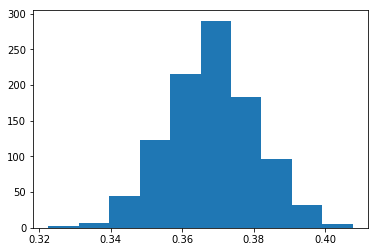

In [42]:
plt.hist(np.log10(draws))

In [17]:
plt.hist(draws)

NameError: name 'plt' is not defined

In [111]:
np.std(draws)

0.4490310721865742

In [112]:
data4

,star_name,mass,mass_error_min,semi_major_axis,semi_major_axis_error_min,semi_major_axis_error_max,mass_error_max
765,HD 34445,0.6290,0.0280,2.0750,0.0160,0.0160,0.0280
766,HD 34445,0.1680,0.0160,0.7181,0.0049,0.0049,0.0160
768,HD 34445,0.0529,0.0089,0.2687,0.0019,0.0019,0.0089
769,HD 34445,0.1190,0.0210,1.5430,0.0160,0.0160,0.0210
770,HD 34445,0.3800,0.1300,6.3600,1.0200,1.0200,0.1300


In [115]:
mtot=(data4.mass).sum()
com=(data4.mass*data4.semi_major_axis).sum()/mtot

In [116]:
dcmdmi=(data4.semi_major_axis-com)/mtot
dcmdri=data4.mass/mtot

In [120]:
np.sqrt((dcmdmi**2*data4.mass_error_min**2+dcmdri**2*data4.semi_major_axis_error_min**2).sum())

0.4355495337742577

In [88]:
print(M_total)

star_name
 OGLE-2016-BLG-1067L     0.43000
 TYC 4282-605-1         10.78000
11 Com                  19.40000
11 Oph                  21.00000
11 UMi                  10.50000
14 And                   5.33000
14 Her                   4.64000
16 Cyg B                 1.68000
18 Del                  10.30000
1RXS1609                14.00000
1SWASP J1407            20.00000
24 Boo                   0.91000
24 Sex                   2.85000
2M  1938+46              1.90000
2M 0103-55 (AB)         13.00000
2M 0122-24              20.00000
2M 0219-39              13.90000
2M 0441+23               7.50000
2M 0746+20              30.00000
2M 1207-39               4.00000
2M 2140+16              20.00000
2M 2206-20              30.00000
2M 2236+4751            12.50000
2MASS J1450-7841 A      40.00000
2MASS J1450-7841 B      40.00000
2MASS J2250+2325        30.00000
30 Ari B                 9.88000
38 Vir                   4.51000
4 Uma                    7.10000
42 Dra                   3.88000


#### For `data1`: #### 
The CM:

In [24]:
r_i = data1["semi_major_axis"]
m_i = data1["mass"]
#the multiplications between columns:
rm_i = r_i.multiply(m_i)
data1 = data1.assign(CM_i=rm_i.values) #New colimn in DataFrame with CM value, per each planet in the system. 
p_system = data1.groupby("star_name")
#p_system.count()

In [82]:
M_total = p_system["mass"].sum()#.tolist() changes from Series to list
sum_rm = p_system['CM_i'].sum()#.tolist()
CM = sum_rm.divide(M_total) #total center of mass, for each extraplanetary system

system = list(data.groupby("star_name").groups.keys())

print(len(p_system),len(CM),len(M_total))

data1 = pd.DataFrame({'system_name':system,'total_mass':M_total.tolist(),'center_of_Mass':CM.tolist()})
data1 #the data after get the Center of Mass for each system 

1292 1292 1292


,system_name,total_mass,center_of_Mass
0,OGLE-2016-BLG-1067L,0.43000,1.700000
1,TYC 4282-605-1,10.78000,0.422000
2,11 Com,19.40000,1.290000
3,11 Oph,21.00000,243.000000
4,11 UMi,10.50000,1.540000
5,14 And,5.33000,0.830000
6,14 Her,4.64000,2.770000
7,16 Cyg B,1.68000,1.680000
8,18 Del,10.30000,2.600000
9,1RXS1609,14.00000,330.000000


### 3. Gaussian Mixture Model


/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/frankb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecatio

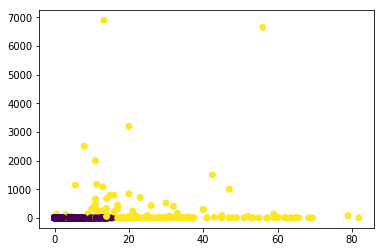

In [101]:
from sklearn.mixture import GMM
import matplotlib.pyplot as plt

gmm = GMM(2, covariance_type='full', random_state=0)
A=data1[["total_mass","center_of_Mass"]]
gmm.fit(A.values)
cluster_label = gmm.predict(A.values)
A.values[:, 0]
plt.scatter(A.values[:, 0], A.values[:, 1], c=cluster_label);